Importing the libraries

In [13]:
import numpy as np
import pandas as pd
import cv2
import os

Checking image colorspace

In [14]:
## /kaggle/input/data-xd/brain_tumor_dataset/yes/Te-glTr_0000.jpg
image_path = os.path.join('/','kaggle','input','data-xd','brain_tumor_dataset', 'yes', 'Te-pi_0066.jpg')
img = cv2.imread(image_path)

if img is None:
    print(f"Failed to load image at {image_path}. Check the file path and try again.")
else:
    if len(img.shape) == 2:
        print("The image is in grayscale.")
    elif len(img.shape) == 3:
        if img.shape[2] == 3:
            print("The image is in BGR colorspace.")
        elif img.shape[2] == 4:
            print("The image is in BGRA colorspace.")
    else:
        print("Unknown colorspace.")

The image is in BGR colorspace.


Loading and resizing the data

In [15]:
X = []
y = []

yes_path = os.path.join('/','kaggle','input','data-xd','brain_tumor_dataset', 'yes')
no_path = os.path.join('/','kaggle','input','data-xd','brain_tumor_dataset', 'no')

target_size = (128, 128)

for file in os.listdir(yes_path):
    file_path = os.path.join(yes_path, file)
    img = cv2.imread(file_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, target_size)
        X.append(img)
        y.append(1)

for file in os.listdir(no_path):
    file_path = os.path.join(no_path, file)
    img = cv2.imread(file_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, target_size)
        X.append(img)
        y.append(0)

X = np.array(X)
y = np.array(y)

Check the shapes of the arrays

In [16]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1574, 128, 128)
y shape: (1574,)


Splitting into training and validation data

In [17]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

Building the model

In [18]:
from keras import layers, models

input_shape = (128,128,1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the model

In [19]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(train_images, train_labels, epochs=20,
          validation_data=(test_images, test_labels),
          callbacks=[early_stopping])

Epoch 1/20
 7/40 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5561 - loss: 7.8389

W0000 00:00:1722008295.837040     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6171 - loss: 3.7381

W0000 00:00:1722008299.642284     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.6187 - loss: 3.6886 - val_accuracy: 0.2825 - val_loss: 1.2934
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8054 - loss: 0.4194 - val_accuracy: 0.4857 - val_loss: 0.8070
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8405 - loss: 0.3751 - val_accuracy: 0.8635 - val_loss: 0.3869
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8619 - loss: 0.3191 - val_accuracy: 0.9016 - val_loss: 0.3013
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8876 - loss: 0.2961 - val_accuracy: 0.8889 - val_loss: 0.3243
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9105 - loss: 0.2491 - val_accuracy: 0.9206 - val_loss: 0.2399
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9283 - loss: 0.2324 - val_accuracy: 0.9429 - val_loss: 0.1630
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9279 - loss: 0.1927 - val_accuracy: 0.9460 - val_loss: 0

Evaluating the model

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10/10 - 0s - 5ms/step - accuracy: 0.9683 - loss: 0.1969

Test accuracy: 0.9682539701461792


Plotting the training

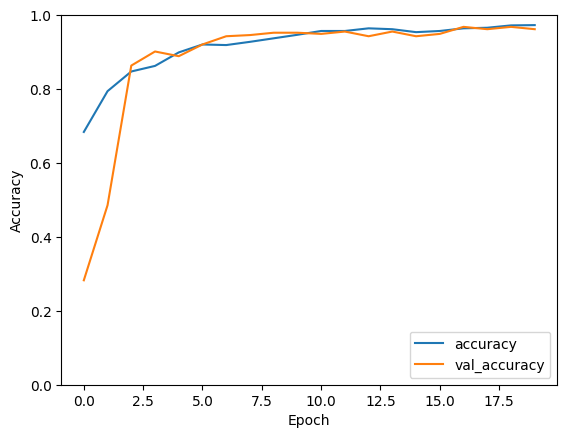

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()